In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### The datafile contains stock market price of AAPL (Apple) from Jan 1990 to Nov 2021.

https://www.kaggle.com/himanshuagrawal26/aapl-stock-price

In [32]:
apple_path = '/Users/ekaterina/Desktop/LEARN/IT/УИИ/МОЙ AI-ПРОЕКТ/AAPL.csv'


In [33]:
%%time
apple = pd.read_csv(apple_path, sep = ',')
print("Data is loaded!")

Data is loaded!
CPU times: user 15.3 ms, sys: 4.37 ms, total: 19.7 ms
Wall time: 26.6 ms


In [34]:
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-1990,0.314732,0.334821,0.312500,0.332589,0.266423,183198400
1,03-01-1990,0.339286,0.339286,0.334821,0.334821,0.268211,207995200
2,04-01-1990,0.341518,0.345982,0.332589,0.335938,0.269106,221513600
3,05-01-1990,0.337054,0.341518,0.330357,0.337054,0.270000,123312000
4,08-01-1990,0.334821,0.339286,0.330357,0.339286,0.271788,101572800


In [35]:
print(apple.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


Open Price

Highest price in a day

Lowest price in a day

**Closing price**

Adjusted Closing price

Volume of shares bought or sold in a day


**Целевая переменная**: Close  (Closing price)

**Основная метрика**: R2 - коэффициент детерминации (sklearn.metrics.r2_score) 

**Вспомогательная метрика**: MSE - средняя квадратичная ошибка (sklearn.metrics.mean_squared_error)


In [36]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8042 entries, 0 to 8041
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8042 non-null   object 
 1   Open       8042 non-null   float64
 2   High       8042 non-null   float64
 3   Low        8042 non-null   float64
 4   Close      8042 non-null   float64
 5   Adj Close  8042 non-null   float64
 6   Volume     8042 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 439.9+ KB


In [37]:
apple.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,8042.0,1.635192e+01,2.969813e+01,1.149550e-01,3.672660e-01,2.111071e+00,2.120420e+01,1.616800e+02
High,8042.0,1.652507e+01,3.002180e+01,1.183040e-01,3.750000e-01,2.138393e+00,2.136366e+01,1.657000e+02
Low,8042.0,1.617867e+01,2.938097e+01,1.138390e-01,3.589290e-01,2.058393e+00,2.098955e+01,1.610000e+02
Close,8042.0,1.635898e+01,2.971786e+01,1.155130e-01,3.671880e-01,2.106428e+00,2.117027e+01,1.653000e+02
Adj Close,8042.0,1.559438e+01,2.944848e+01,9.903700e-02,3.089235e-01,1.805978e+00,1.838979e+01,1.653000e+02
Volume,8042.0,3.831832e+08,3.633095e+08,2.396800e+06,1.478439e+08,2.664242e+08,4.808804e+08,7.421641e+09


mu = 16.36 and sigma = 29.72


Text(0.5, 1.0, 'Volume distribution')

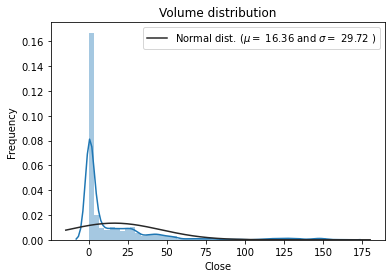

In [38]:
sns.distplot(apple['Close'], fit=norm)

mu, sigma = norm.fit(apple['Close'])

print(f'mu = {mu:.2f} and sigma = {sigma:.2f}')

plt.legend(
    [f'Normal dist. ($\mu=$ {mu:.2f} and $\sigma=$ {sigma:.2f} )'])
plt.ylabel('Frequency')
plt.title('Volume distribution')



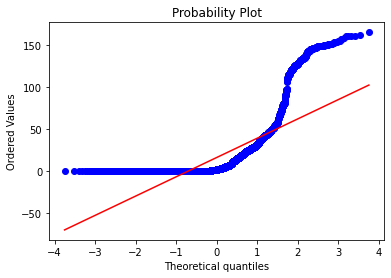

In [39]:
# QQ-plot
fig = plt.figure()
res = stats.probplot(apple['Close'], plot=plt)
plt.show()

plt.figure(figsize=(18, 6))
sns.barplot(apple['Open'], apple['Close'])
plt.xticks(rotation=90)
plt.title('Distribution of variable Open')

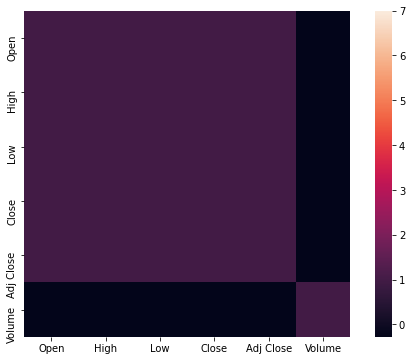

In [40]:
corrmat = apple.loc[:].corr()
plt.subplots(figsize=(9, 6))
sns.heatmap(corrmat, vmax=7, square=True)

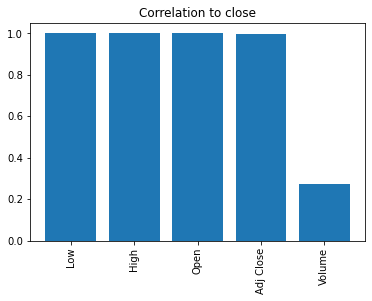

In [41]:
corrmat = apple.loc[:].corrwith(
    apple['Close']).abs().sort_values(ascending=False)[1:]
plt.bar(corrmat.index, corrmat.values)
plt.title('Correlation to close')
plt.xticks(rotation='vertical')
plt.show()

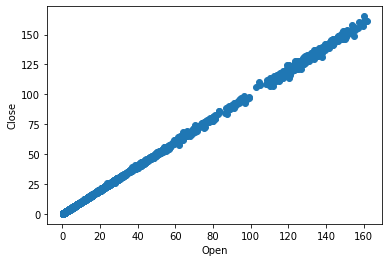

In [42]:
plt.scatter(apple['Open'], apple['Close'])
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

In [46]:
features = ['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume']
target = 'Close'

In [47]:
apple[features]

,Date,Open,High,Low,Adj Close,Volume
0,02-01-1990,0.314732,0.334821,0.312500,0.266423,183198400
1,03-01-1990,0.339286,0.339286,0.334821,0.268211,207995200
2,04-01-1990,0.341518,0.345982,0.332589,0.269106,221513600
3,05-01-1990,0.337054,0.341518,0.330357,0.270000,123312000
4,08-01-1990,0.334821,0.339286,0.330357,0.271788,101572800
...,...,...,...,...,...,...
8037,23-11-2021,161.119995,161.800003,159.059998,161.410004,96041900
8038,24-11-2021,160.750000,162.139999,159.639999,161.940002,69463600
8039,26-11-2021,159.570007,160.449997,156.360001,156.809998,76959800
8040,29-11-2021,159.369995,161.190002,158.789993,160.240005,88748200


In [51]:
apple[target]

0         0.332589
1         0.334821
2         0.335938
3         0.337054
4         0.339286
           ...    
8037    161.410004
8038    161.940002
8039    156.809998
8040    160.240005
8041    165.300003
Name: Close, Length: 8042, dtype: float64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    apple[features], apple[target], test_size=0.3, random_state=42)

In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5629 entries, 7324 to 7270
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5629 non-null   object 
 1   Open       5629 non-null   float64
 2   High       5629 non-null   float64
 3   Low        5629 non-null   float64
 4   Adj Close  5629 non-null   float64
 5   Volume     5629 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 307.8+ KB


In [50]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2413 entries, 8006 to 6638
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2413 non-null   object 
 1   Open       2413 non-null   float64
 2   High       2413 non-null   float64
 3   Low        2413 non-null   float64
 4   Adj Close  2413 non-null   float64
 5   Volume     2413 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 132.0+ KB


In [52]:
y_train.head()

7324    39.075001
555      0.560268
6773    26.777500
1485     0.370536
5746    23.206785
Name: Close, dtype: float64